In [1]:
import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import community
import pandas as pd


import chart_studio.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


import metaknowledge as mk
RC = mk.RecordCollection(r'D:\python科学计量可视化\数据\Demo data\Python-Wos', cached = True)
RC2021 = RC.yearSplit(2020,2021)
df = pd.DataFrame(RC2021.makeDict())
print(len(df))
df.head()

783


,PT,AU,AF,TI,SO,LA,DT,ID,AB,C1,...,SI,HC,HP,CT,CY,CL,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Smutny, Z, Vehovar, V]","[Smutny, Zdenek, Vehovar, Vasja]",Social Informatics Research: Schools of Though...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,English,Article,[SCIENCE],Research activities related to social informat...,"[Univ Econ, Fac Informat & Stat, W Churchill S...",...,None,None,None,None,None,None,2,0,0,2
1,J,"[Wieland, M, Gorraiz, J]","[Wieland, Martin, Gorraiz, Juan]",The rivalry between Bernini and Borromini from...,SCIENTOMETRICS,English,Article,[WORLDCAT],"From a historical point of view, Rome and espe...","[Univ Vienna, Vienna Univ Lib, Dept Bibliometr...",...,None,None,None,None,None,None,2,2,0,0
2,J,"[van der Vegt, A, Zuccon, G, Koopman, B]","[van Der Vegt, Anton, Zuccon, Guido, Koopman, ...",Do better search engines really equate to bett...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,English,Article,"[INFORMATION, RELEVANCE, FRAMEWORK, LIBRARY]",Previous research has found that improved sear...,"[Univ Queensland, Sch Informat Technol & Elect...",...,None,None,None,None,None,None,3,2,0,1
3,J,"[Merga, MK, Roni, SM, Mason, S]","[Merga, Margaret K., Mat Roni, Sayidi, Mason, ...",Should Google Scholar be used for benchmarking...,SCIENTOMETRICS,English,Article,"[INDEX CAUTIONARY USE, H-INDEX, MULTIPLE VERSI...",In the neoliberal environment of contemporary ...,"[Edith Cowan Univ, Sch Educ, Perth, WA, Austra...",...,None,None,None,None,None,None,3,0,1,2
4,J,"[Falk, MT, Hagsten, E]","[Falk, Martin Thomas, Hagsten, Eva]",When international academic conferences go vir...,SCIENTOMETRICS,English,Article,"[TECHNOLOGY, ACCEPTANCE]",This study investigates the extent to which in...,"[Univ South Eastern Norway USN, Sch Business, ...",...,None,None,None,None,None,None,2,1,1,0


In [2]:
bibcoup_net = RC2021.networkBibCoupling()
print(mk.graphStats(bibcoup_net))

Nodes: 714
Edges: 17427
Isolates: 22
Self loops: 0
Density: 0.0684644
Transitivity: 0.375307


当前网络数据集过大，需要进行连线的处理

In [3]:
mk.dropEdges(bibcoup_net,minWeight=5)
print(mk.graphStats(bibcoup_net))

Nodes: 714
Edges: 632
Isolates: 402
Self loops: 0
Density: 0.0024829
Transitivity: 0.318251


删除孤立点

In [4]:
def filter_isolate_nodes(G, min_count=1):
    print('未剔除孤立点之前的网络数据集基础信息：\n')
    print(mk.graphStats(G)+'\n')
    G_filter = G.subgraph([j for c in nx.connected_components(G) if len(c) > min_count for j in c])
    return G_filter

未剔除孤立点之前的网络数据集基础信息：

Nodes: 714
Edges: 632
Isolates: 402
Self loops: 0
Density: 0.0024829
Transitivity: 0.318251

Graph with 264 nodes and 608 edges


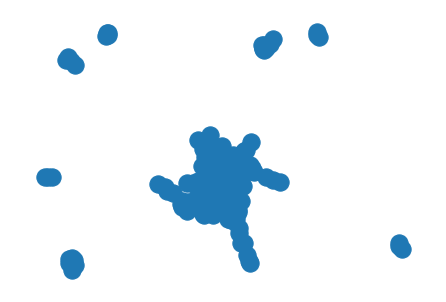

In [5]:
bibcoup_net_filter = filter_isolate_nodes(bibcoup_net,min_count=2)
print(bibcoup_net_filter)
nx.draw_spring(bibcoup_net_filter)

观察网络图可以发现主要的信息都在最大子群中，与其进行最小节点个数的查看逐个筛选，不如直接获取最大子群数据集

In [6]:
giant_net = max([bibcoup_net_filter.subgraph(c) for c in nx.connected_components(bibcoup_net_filter)],key=len)
print(mk.graphStats(giant_net))

Nodes: 232
Edges: 568
Isolates: 0
Self loops: 0
Density: 0.0211972
Transitivity: 0.309722


In [7]:
714-402-232

80

In [8]:
632-568

64

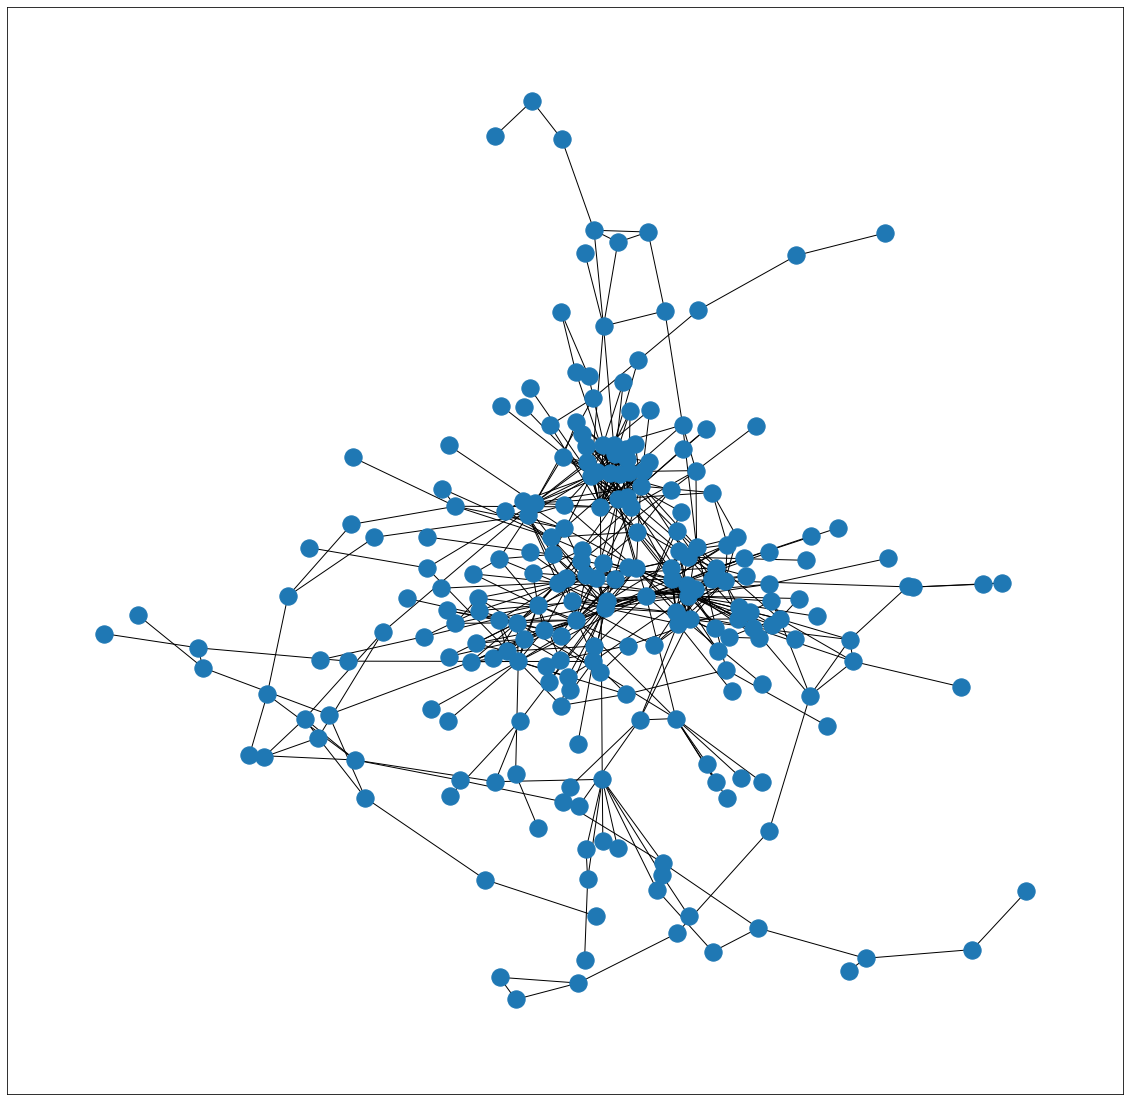

In [9]:
plt.figure(figsize=(20,20))

pos = nx.spring_layout(giant_net,seed=42,k=0.2)
nx.draw_networkx_edges(giant_net,pos)
nx.draw_networkx_nodes(giant_net,pos)
# nx.draw_networkx_labels(giant_net,pos)

plt.show()

In [10]:
sorted([(k,v) for k,v in giant_net.degree()],key=lambda x:x[1],reverse=True)

[('Copiello S, 2020, SCIENTOMETRICS', 29),
 ('Fang Zc, 2020, SCIENTOMETRICS', 24),
 ('Hou Jh, 2020, J INFORMETR', 20),
 ('Wei Mk, 2020, SCIENTOMETRICS', 20),
 ('Hassan Su, 2020, SCIENTOMETRICS', 20),
 ('Lin Dm, 2020, SCIENTOMETRICS', 20),
 ('Thelwall M, 2020, J ASSOC INF SCI TECH', 19),
 ('Wang Zq, 2020, SCIENTOMETRICS', 18),
 ('Colladon Af, 2020, SCIENTOMETRICS', 18),
 ('Lyu Dq, 2021, SCIENTOMETRICS', 18),
 ('Szomszor M, 2020, SCIENTOMETRICS', 18),
 ('Hancean Mg, 2021, SCIENTOMETRICS', 18),
 ('Wang Zq, 2020, J INFORMETR', 17),
 ('Xie Z, 2020, J INFORMETR', 17),
 ('Hou Jh, 2020, SCIENTOMETRICS', 17),
 ('Bornmann L, 2020, SCIENTOMETRICS', 15),
 ('Bornmann L, 2020, J INFORMETR', 15),
 ('Fang Zc, 2020, J ASSOC INF SCI TECH', 14),
 ('Pech G, 2020, SCIENTOMETRICS', 14),
 ('Fassin Y, 2020, SCIENTOMETRICS', 14),
 ('Simoes N, 2020, J INFORMETR', 14),
 ('Simoes N, 2020, SCIENTOMETRICS', 14),
 ('Zuo Zy, 2021, J ASSOC INF SCI TECH', 13),
 ('Karmakar M, 2020, SCIENTOMETRICS', 12),
 ('Chan Hf, 2020

按照最大节点度进行网络数据集精简或者直接使用dropNodesByDegree

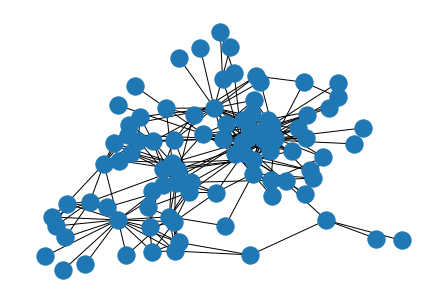

In [11]:
ego_hub = nx.ego_graph(giant_net,'Copiello S, 2020, SCIENTOMETRICS',radius=2)
nx.draw_spring(ego_hub)

可以发现，该保留的重要信息节点都保留下来了

In [12]:
sorted([(k,v) for k,v in ego_hub.degree()],key=lambda x:x[1],reverse=True)[:35]

[('Copiello S, 2020, SCIENTOMETRICS', 29),
 ('Fang Zc, 2020, SCIENTOMETRICS', 24),
 ('Hou Jh, 2020, J INFORMETR', 20),
 ('Wei Mk, 2020, SCIENTOMETRICS', 20),
 ('Hassan Su, 2020, SCIENTOMETRICS', 20),
 ('Thelwall M, 2020, J ASSOC INF SCI TECH', 19),
 ('Wang Zq, 2020, SCIENTOMETRICS', 18),
 ('Wang Zq, 2020, J INFORMETR', 17),
 ('Hou Jh, 2020, SCIENTOMETRICS', 17),
 ('Fang Zc, 2020, J ASSOC INF SCI TECH', 14),
 ('Pech G, 2020, SCIENTOMETRICS', 14),
 ('Lin Dm, 2020, SCIENTOMETRICS', 14),
 ('Karmakar M, 2020, SCIENTOMETRICS', 12),
 ('Colladon Af, 2020, SCIENTOMETRICS', 11),
 ('Lyu Xz, 2020, SCIENTOMETRICS', 11),
 ('Fassin Y, 2020, SCIENTOMETRICS', 10),
 ('Bornmann L, 2020, SCIENTOMETRICS', 10),
 ('Bornmann L, 2020, J INFORMETR', 10),
 ('Xie Z, 2020, J INFORMETR', 9),
 ('Wang X, 2020, J INFORMETR', 9),
 ('Simoes N, 2020, J INFORMETR', 9),
 ('Simoes N, 2020, SCIENTOMETRICS', 9),
 ('Lathabai Hh, 2020, J INFORMETR', 8),
 ('Kong L, 2020, J INFORMETR', 8),
 ('Zuo Zy, 2021, J ASSOC INF SCI TECH', 

In [13]:
nx.center(giant_net)
#网络的中心对应的节点均在筛选的网络图中

['Wang Zq, 2020, SCIENTOMETRICS',
 'Hou Jh, 2020, J INFORMETR',
 'Fang Zc, 2020, SCIENTOMETRICS',
 'Clermont M, 2021, SCIENTOMETRICS',
 'Wei Mk, 2020, SCIENTOMETRICS',
 'Hassan Su, 2020, SCIENTOMETRICS',
 'Copiello S, 2020, SCIENTOMETRICS']

进一步可视化网络图

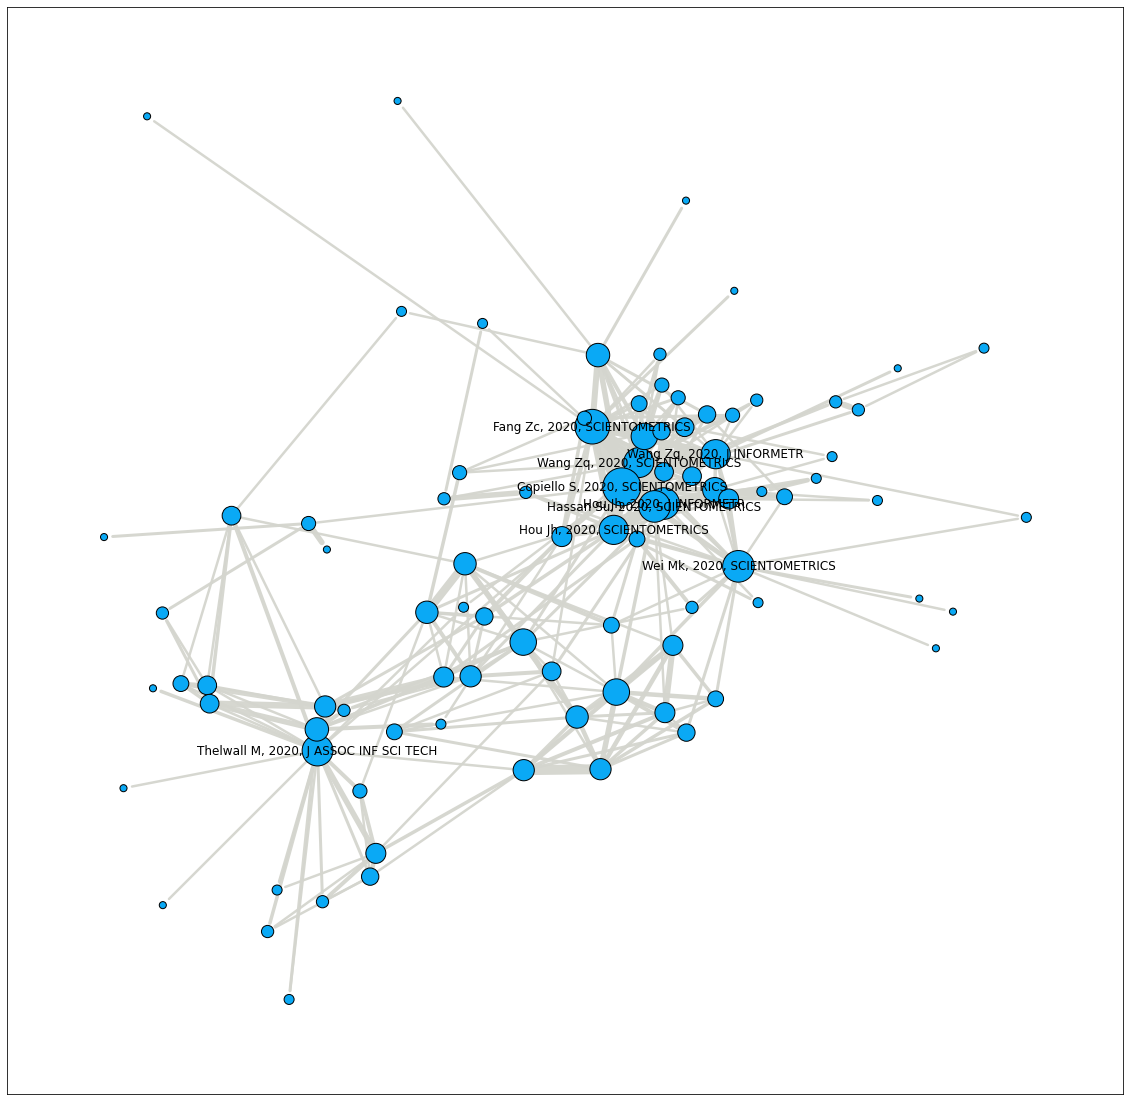

In [14]:
node_size = [v*50 for k,v in ego_hub.degree()]
edge_width = [v[-1]['weight']*0.5 for v in ego_hub.edges.data()]

plt.figure(figsize=(20,20))
pos = nx.spring_layout(giant_net,seed=1)
#按照连线的权重设置连线的粗细
edges = nx.draw_networkx_edges(ego_hub,pos,edge_color='#D4D5CE',alpha=0.95,width=edge_width,arrows=True)

#按照节点count计数属性或者节点度相关指标进行节点大小设置
nodes = nx.draw_networkx_nodes(ego_hub,pos,edgecolors='k',node_size=node_size,node_color='#0AA9F5')

# #按照节点count计数属性或者节点度相关指标进行标签大小设置

G_sub = ego_hub.subgraph([k for k,v in ego_hub.degree() if v >=15])
nx.draw_networkx_labels(G_sub,pos,font_size=12)

plt.savefig('figures/bib_coupling_network.png',dpi=300,bbox='tight')

In [15]:
def degreeStats(Graph):
    import pandas as pd
    
    deg = nx.degree_centrality(Graph)
    eig = nx.eigenvector_centrality(Graph,max_iter=500)
    bet = nx.betweenness_centrality(Graph)
    clo = nx.closeness_centrality(Graph)
    
    df = pd.DataFrame([deg, eig, bet, clo],index=['degree', 'eigenvector', 'betweenness', 'closeness']).T

    return df

df = degreeStats(ego_hub)
df['node_degree'] = [v for k,v in ego_hub.degree()]
df.sort_values('node_degree',ascending=False)[:20]

,degree,eigenvector,betweenness,closeness,node_degree
"Copiello S, 2020, SCIENTOMETRICS",0.322222,0.345159,0.351420,0.596026,29
"Fang Zc, 2020, SCIENTOMETRICS",0.266667,0.316871,0.104849,0.502793,24
"Wei Mk, 2020, SCIENTOMETRICS",0.222222,0.208201,0.155940,0.478723,20
"Hassan Su, 2020, SCIENTOMETRICS",0.222222,0.296776,0.062041,0.497238,20
"Hou Jh, 2020, J INFORMETR",0.222222,0.266329,0.100522,0.483871,20
"Thelwall M, 2020, J ASSOC INF SCI TECH",0.211111,0.047013,0.222431,0.476190,19
"Wang Zq, 2020, SCIENTOMETRICS",0.200000,0.259003,0.062287,0.471204,18
"Hou Jh, 2020, SCIENTOMETRICS",0.188889,0.261187,0.049952,0.481283,17
"Wang Zq, 2020, J INFORMETR",0.188889,0.254835,0.054604,0.473684,17
"Pech G, 2020, SCIENTOMETRICS",0.155556,0.094003,0.070509,0.463918,14
